<a href="https://www.kaggle.com/code/seherbal/medical-cost-iii?scriptVersionId=141090982" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.svm import SVR
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
%matplotlib inline

import joblib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# !pip install catboost
# !pip install lightgbm
# !pip install xgboost

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [28]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
################################################
# 1. Exploratory Data Analysis (EDA)
################################################
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())  #eksik değerler
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(1338, 7)
##################### Types #####################
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
##################### Head #####################
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
##################### Tail #####################
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629

Dataset, 7 gözlem ve 1338 veriden oluşmaktadır. Değişkenler, age, sex,bmi,children, smoker,charges olarak 7 tanedir(Gözlem).Eksik gözlem yoktur.

age -- Yaş, sağlık sigortasında önemli bir faktördür, çünkü yaşlı bireyler genç bireylere kıyasla genellikle daha yüksek sağlık sorunları riski altındadır. Bu nedenle yaş genellikle daha yüksek sigorta masraflarıyla ilişkilidir.

sex -- Cinsiyet: Cinsiyet sağlık sigortası maliyetlerinde rol oynayabilir. Bazı araştırmalar, kadınların özellikle doğurganlık yıllarında sağlık hizmetlerinden daha fazla yararlanma eğiliminde olduklarını öne sürüyor. Ancak cinsiyetin sağlık sigortası ücretleri üzerindeki etkisi diğer faktörlere bağlı olarak değişebilmektedir.

bmi -- (Vücut Kitle İndeksi): BMI, bireyin doku kütlesini ölçmeye çalışan bir ölçümdür. Bir kişinin belirli bir boy için sağlıklı bir vücut ağırlığına sahip olup olmadığını değerlendirmek için yaygın olarak basit bir yöntem olarak kullanılır. Yüksek BMI değerleri genellikle kalp hastalığı, diyabet ve belirli kanser türleri gibi daha yüksek sağlık bakım maliyetlerine yol açabilecek daha yüksek kronik hastalık riskiyle ilişkilidir.

children -- Çocuklar: Bir kişinin bakmakla yükümlü olduğu kişilerin sayısı sağlık sigortası masraflarını etkileyebilir. Daha fazla bakmakla yükümlü olunan kişi genellikle daha yüksek sigorta masrafları anlamına gelir çünkü daha fazla kişi aynı plan kapsamındadır.

smoker: Sigara içmek kalp hastalığı, felç ve kanser dahil olmak üzere birçok sağlık durumu için önemli bir risk faktörüdür. Sigara içenler, bu artan sağlık riskleri nedeniyle sıklıkla daha yüksek sağlık sigortası masraflarıyla karşı karşıya kalmaktadır.

insurance -- Masraflar: Bu, sağlık sigortası tarafından faturalandırılan bireysel tıbbi masraflardır. Bu veri kümesindeki bağımlı değişkendir ve diğer tüm faktörlerden etkilenir. Bağımsız değişkenler (yaş, cinsiyet, vücut kitle indeksi, çocuklar, sigara içen, bölge) ve ücretler arasındaki ilişkileri anlamak bu analizin temel amacıdır.

charges: Bu, sağlık sigortası tarafından faturalandırılan bireysel tıbbi masraflardır. Bu veri kümesindeki bağımlı değişkendir ve diğer tüm faktörlerden etkilenir. Bağımsız değişkenler (yaş, cinsiyet, vücut kitle indeksi, çocuklar, sigara içen, bölge) ve ücretler arasındaki ilişkileri anlamak bu analizin temel amacıdır.

In [31]:
duplicate = df[df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [32]:
#bu fonksiyon kategorik ve sayısal değişkenleri ayırt etmek için
def grab_col_names(dataframe, cat_th=10, car_th=20):
# cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols, cat_but_car

In [33]:
#bir kategorik değişkeni ve df verdiğimde sınıf frekans ve oranını gösteriyor.
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [34]:
# Değişken türlerinin ayrıştırılması
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

# Kategorik değişkenlerin incelenmesi
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    676  50.523169
female  662  49.476831
##########################################
     smoker      Ratio
no     1064  79.521674
yes     274  20.478326
##########################################
           region      Ratio
southeast     364  27.204783
southwest     325  24.289985
northwest     325  24.289985
northeast     324  24.215247
##########################################


Yukarıda, sex, smoker,region kategorik değişkenlerinin değerleri ve oranları vardır. Kadın ve erkek oranları arasında çok fark yoktur, etkileme biçimleri neredeyse aynı. Sigara içmeyenler veri setinde oldukça fazladır veri setine oranı .79 dur ve .79 etkiler. Bölgeler neredeyse aynı oranda etki verirler.

In [35]:
# Sayısal değişkenlerin incelenmesi
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


numerik değişkenlere baktığımızda age, bmi, children, charges olarak 4 gözlemden oluştur. age ve bmi normal görünüyor. children değerleri incelenmesi gerekebilir.

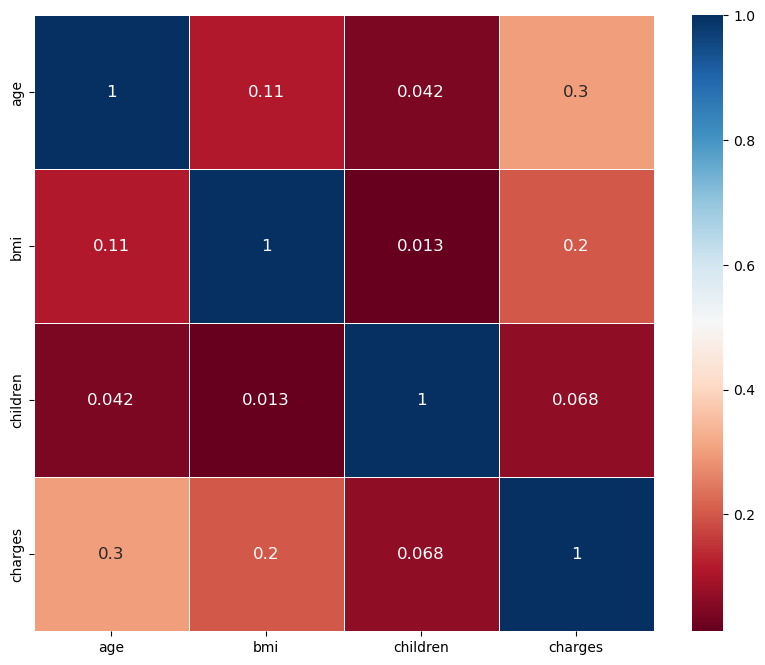

In [36]:
#veri seti içindeki sayısal değişkenlerin birbirlerine arasında korelasyonu ve görseli
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)
    
correlation_matrix(df, num_cols)

Korelasyon matrisi,Değerin 0 a yakın olması iki değişken arasında bir bağlantılı olmadığını gösteriyor 1 yakın olması da ilişkili olduğunu gösterir. age ve changes değişkenine baktığımızda 0.3 değerini görüyoruz. 0 a daha yakın aralarında ilişki yok denecek kadar az.

# Bmi (Vücut Kitle İndeksi) dağılımını inceleyin

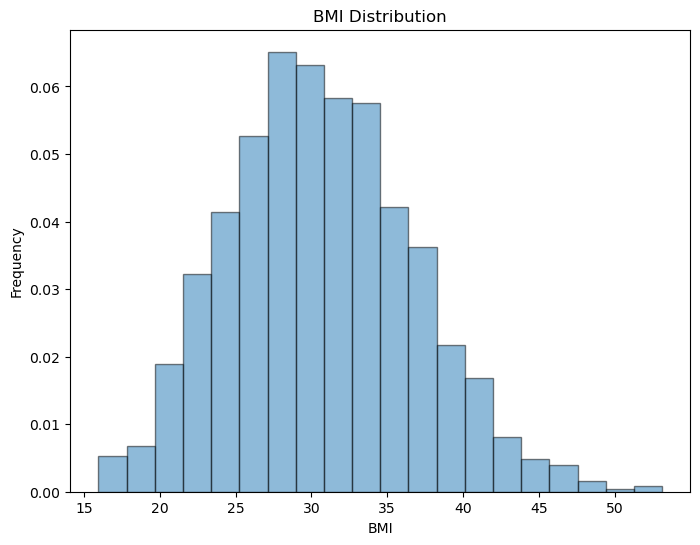

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=20, density = 1, alpha = 0.5, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

bins değeri= 20 verildi, 20 parçaya böldü. Sağdan çarpılık, pozitif değeri vardır.15 den 25 e kadar artarak ilerlemiş. 25 - 35 BMI değerlerinin sıklığının daha fazla olduğunu görüyoruz. 40 - 45 arası değerler en düşük.

# "smoker" ile "charges" arasındaki ilişkiyi inceleyin

<Axes: title={'center': 'Box plot for charges'}, xlabel='charges', ylabel='smoker'>

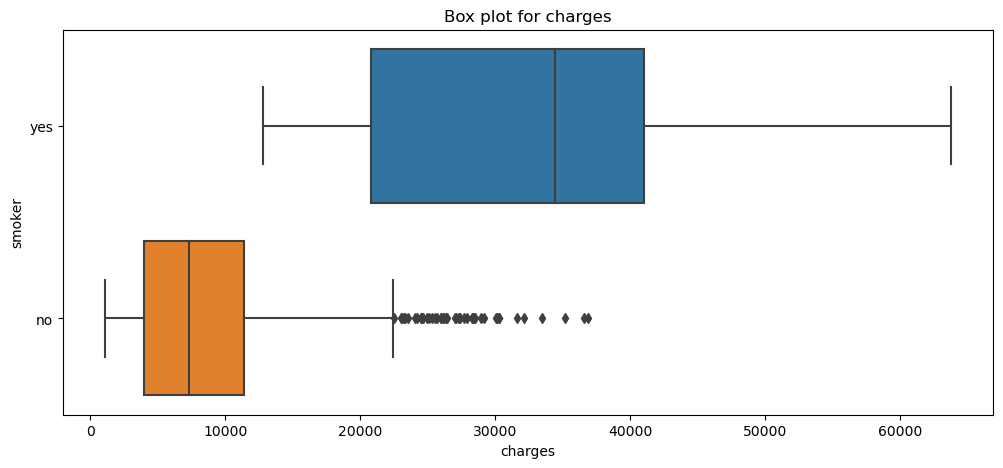

In [38]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges")
sns.boxplot(y="smoker", x="charges", data =  df, orient="h")

# "smoker" ile “region” arasındaki ilişkiyi inceleyin.

<Axes: xlabel='region', ylabel='count'>

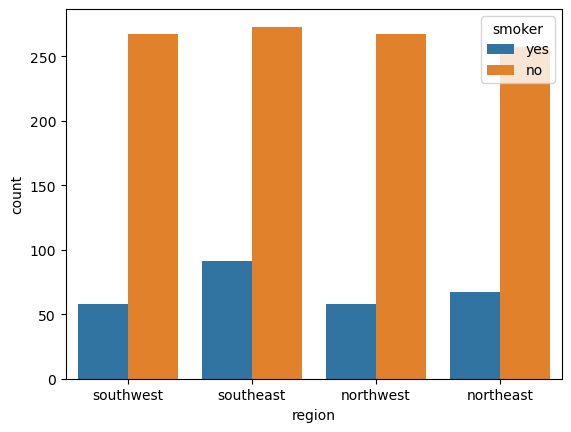

In [39]:
#kategorik
sns.countplot(x ='region', hue = "smoker", data = df)

regionlara genel olarak baktığımızda sigara içme ve içmeme durumları birbirlerine oldukça yakın. southest ve northeast de diğerlerine göre sigara içenler daha fazla diyebiliriz fakat çok ayırt edici bir durum değildir.

# “BMI” ile “sex” arasındaki ilişkiyi inceleyin.

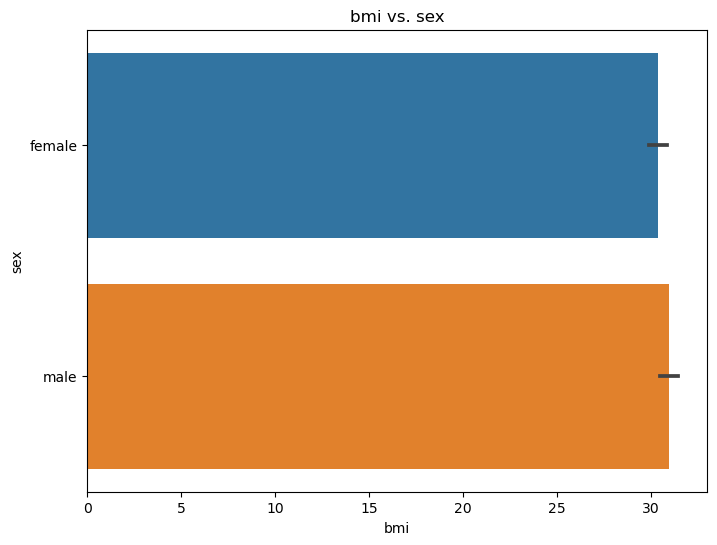

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='bmi', y='sex')
plt.xlabel('bmi')
plt.ylabel('sex')
plt.title('bmi vs. sex')
plt.show()

çok büyük fark olmamakla birlikte erkeklerde bmi değeri genellikle daha yüksek denebilir.

# En çok "child" bulunan "region" bulun.

<Axes: xlabel='region', ylabel='count'>

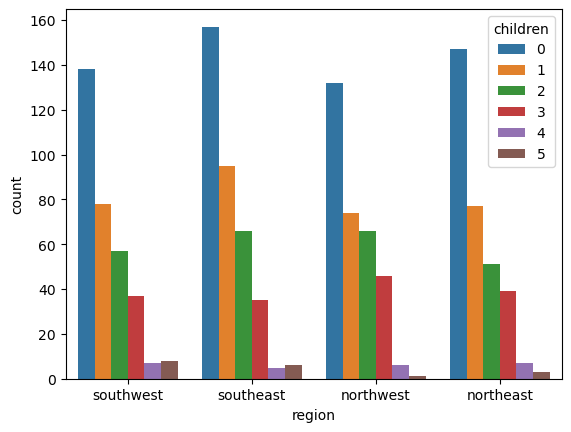

In [41]:
#kategorik
sns.countplot(x ='region', hue = "children", data = df)


Genellikle tüm bölgelerde çocuk olmama(0) durumu daha fazladır, southeast de 1 çocuklu olmak en fazla yaklaşık 70 kişi, northwest de 2 çocuklu sayısı en fazla 5 çocuk sayısı en azdır, northeast de 5 çocuk sayısı fazladır.

# “age” ile “BMI” arasındaki ilişkiyi inceleyin.

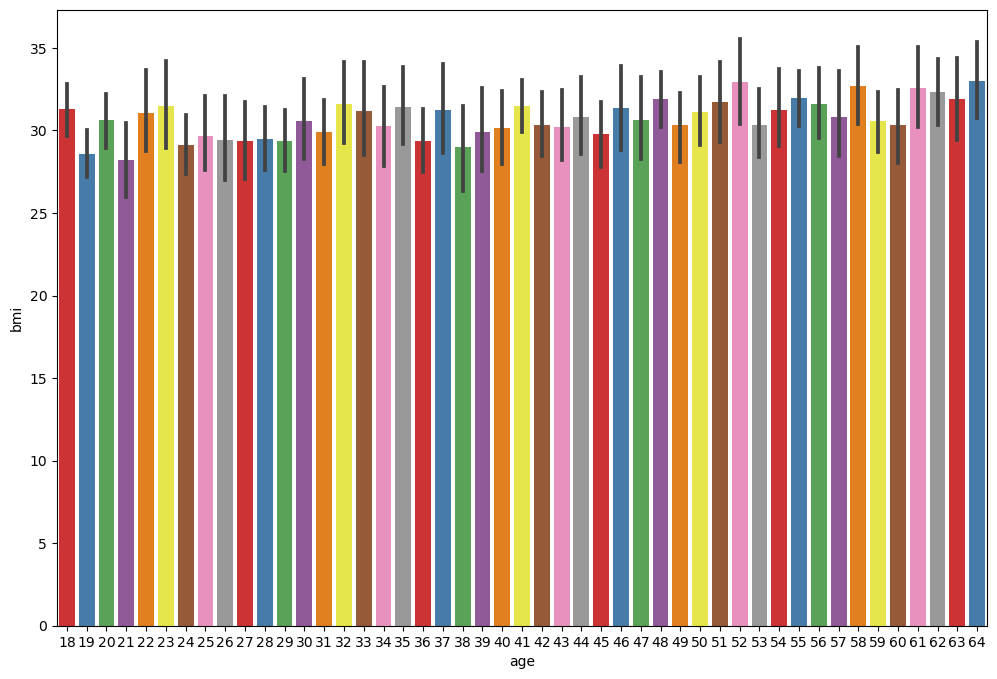

In [42]:
#sayısal
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='age', y='bmi', data=df, palette='Set1')

# “BMI” ile “children” arasındaki ilişkiyi inceleyin.

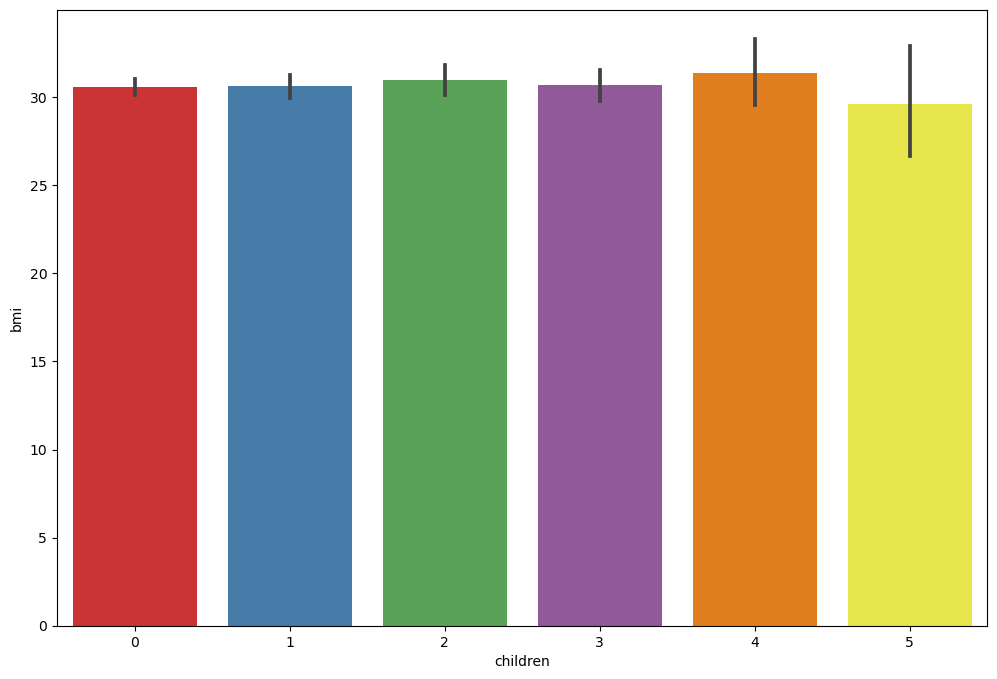

In [43]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='children', y='bmi', data=df, palette='Set1')

# "BMI" değişkeninde aykırı değer var mı? Gözden geçirin

<Axes: xlabel='bmi'>

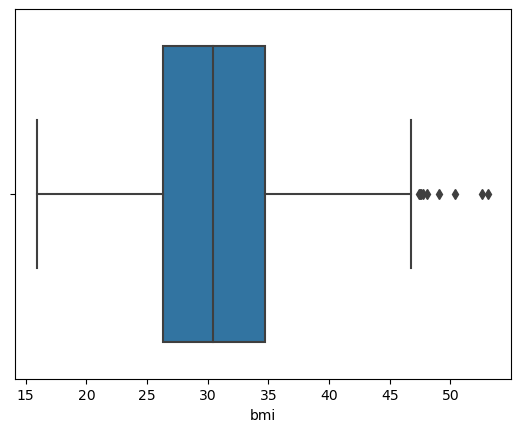

In [44]:
sns.boxplot(x="bmi", data=df)

Grafiğe baktığımızda, bmı değişkeninin 7 tane aykırı değeri olduğu görülüyor. BMI değeri 45-60 arası olan bir insanın yaşaması mümkün değildir bu sebeple aykırı değer kategorisine girer. Bu değerler yanlış yazılmış olabilir. Bu verileri veri setinden kaldırmamız gerekecek.

# “BMI” ile “changes” arasındaki ilişkiyi inceleyin.

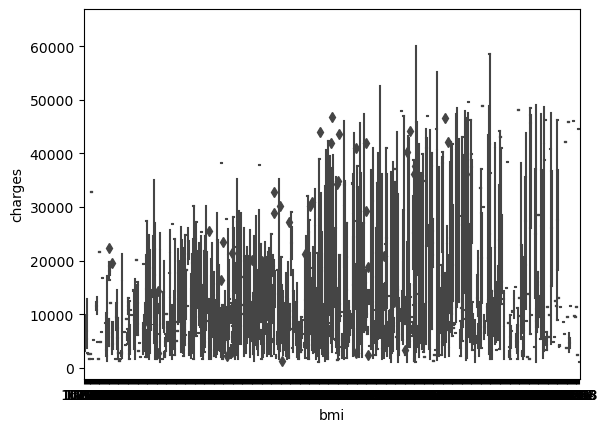

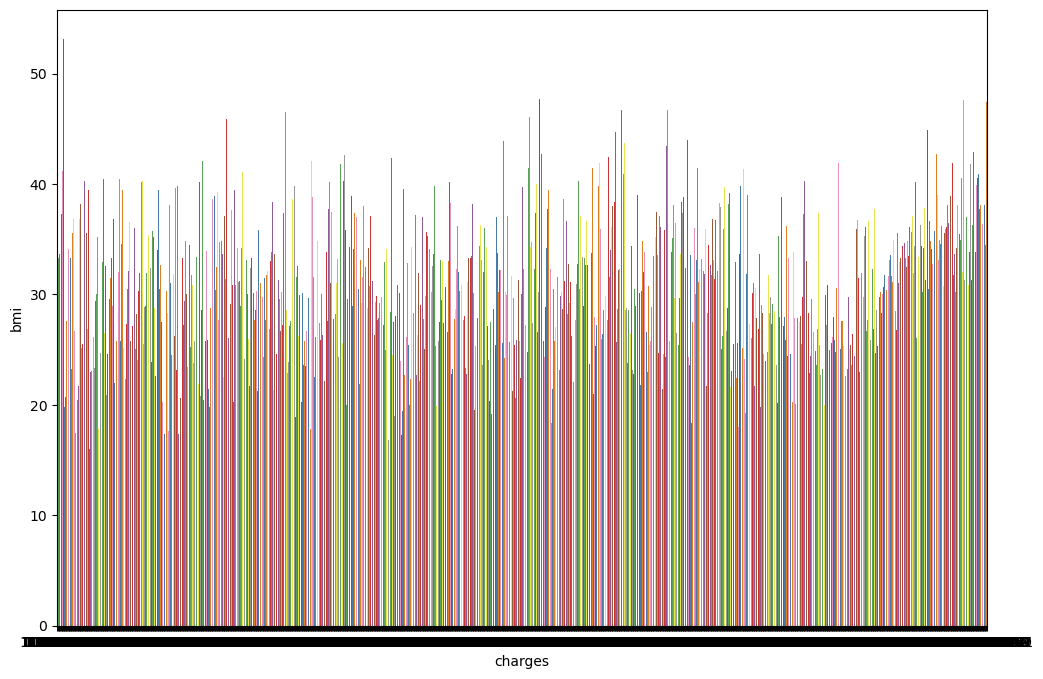

In [45]:
#sayısal
sns.boxplot(x = df['bmi'],
            y = df['charges'])

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='charges', y='bmi', data=df, palette='Set1')

# Barplot grafiğini kullanarak “region”, “smoker” ve “bmi” arasındaki ilişkiyi inceleyin.

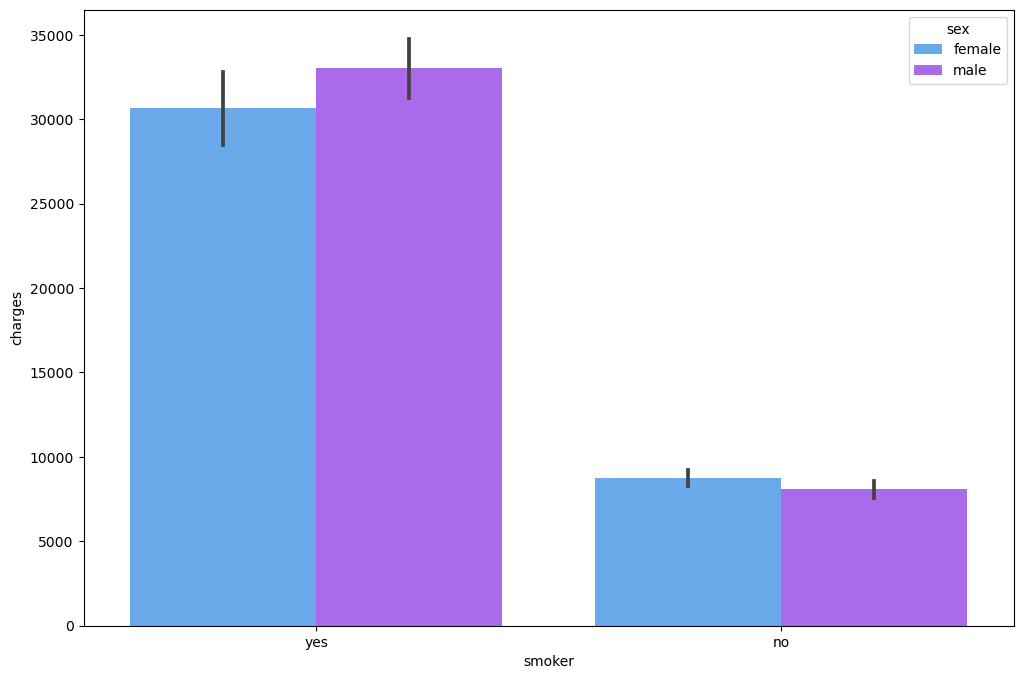

In [46]:
#bar plot

f, ax = plt.subplots(1, 1, figsize=(12, 8))
sax = sns.barplot(x='smoker', y='charges', hue='sex', data=df, palette='cool')

Sigara içen kadın ve erkekler için charge daha yüksekken içmeyenlerde maliyet oldukça düşüktür.

In [47]:
#girilen değişkenin alt ve üst değerlerini hesaplar.
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


In [48]:
#herhangi bir değişkende aykırı değer var mı? 
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False



In [49]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols #kategorik değişkenler listesi

['sex', 'smoker', 'region', 'children']

In [50]:
# numericlerde outlier var mı ?
for col in num_cols:
    print(col, check_outlier(df, col))

age False
bmi True
charges True


In [51]:
df.shape
#1337 gözlem var, bunlardan 14 tanesi aykırı değerler. Aykırı değer sayısı az olduğu için silme yöntemi ile aykırı değerlerden kurtulalım. 

(1338, 7)

In [52]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]  #aykırı değerlerin olmadığı seçip yap buna da yeni df de
    return df_without_outliers

for col in num_cols:
    df = remove_outlier(df, "bmi")
    
for col in num_cols:
    df = remove_outlier(df, "charges")

In [53]:
for col in num_cols:
    print(col, check_outlier(df, col))

age False
bmi True
charges True


In [54]:
# tüm veri setinde eksik değer var mı ?
df.isnull().values.any()

False

In [55]:
#iki veya daha fazla sınıflı kategorik değişkenleri bununla biçimleyeceğim.
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [56]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [57]:
df.replace({'sex':{'male':0,'female':1}}, inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [58]:
#Models

X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [60]:
def scores(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

In [61]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [62]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,1.708434e+03
MSE_li_reg,1.220523e+07
RMSE_li_reg,3.493598e+03


In [63]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.83025551 0.88872773 0.85698366 0.83358116 0.77798646]


In [64]:
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

0.6555692449641151

In [65]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)


GradientBoostingRegressor()

In [66]:
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,1.708417e+03
MSE_gradient,1.250477e+07
RMSE_gradient,3.536209e+03


In [67]:
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.82494432 0.87683854 0.8407013  0.81245447 0.78068379]


In [68]:
r2_score(y_test, Gradient_model.predict(X_test_scaled))

0.6471161107259131

In [69]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train);

In [70]:
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,2.040374e+03
MSE_tree_reg,2.408709e+07
RMSE_tree_reg,4.907860e+03


In [71]:
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.61872001 0.48126742 0.54001279 0.53370648 0.70623082]


In [72]:
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

0.3202638544384995

In [73]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);

In [74]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,1.851180e+03
MSE_forest_reg,1.430148e+07
RMSE_forest_reg,3.781729e+03


In [75]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.80292853 0.83712727 0.81993469 0.8107773  0.75539315]


In [76]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

0.5964132376635227